EDA

In [ ]:
!wget -O train.jsonl "https://huggingface.co/datasets/iluvvatar/NEREL/resolve/main/data/train.jsonl"
!wget -O dev.jsonl   "https://huggingface.co/datasets/iluvvatar/NEREL/resolve/main/data/dev.jsonl"
!wget -O test.jsonl  "https://huggingface.co/datasets/iluvvatar/NEREL/resolve/main/data/test.jsonl"

!wget -O ent_types.jsonl "https://huggingface.co/datasets/iluvvatar/NEREL/resolve/main/ent_types.jsonl"
!wget -O rel_types.jsonl "https://huggingface.co/datasets/iluvvatar/NEREL/resolve/main/rel_types.jsonl"

--2025-09-16 09:39:42--  https://huggingface.co/datasets/iluvvatar/NEREL/resolve/main/data/train.jsonl
Resolving huggingface.co (huggingface.co)... 13.35.202.97, 13.35.202.34, 13.35.202.121, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.97|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /api/resolve-cache/datasets/iluvvatar/NEREL/b8bbfeb80905e6d66dc06a47ec6e37b502ea6c69/data%2Ftrain.jsonl?%2Fdatasets%2Filuvvatar%2FNEREL%2Fresolve%2Fmain%2Fdata%2Ftrain.jsonl=&etag=%22bd19e471916b2f13bf4db564cc9ae686b8bcaa8f%22 [following]
--2025-09-16 09:39:42--  https://huggingface.co/api/resolve-cache/datasets/iluvvatar/NEREL/b8bbfeb80905e6d66dc06a47ec6e37b502ea6c69/data%2Ftrain.jsonl?%2Fdatasets%2Filuvvatar%2FNEREL%2Fresolve%2Fmain%2Fdata%2Ftrain.jsonl=&etag=%22bd19e471916b2f13bf4db564cc9ae686b8bcaa8f%22
Reusing existing connection to huggingface.co:443.
HTTP request sent, awaiting response... 200 OK
Length: 7570232 (7.2M) [text/plain]
Saving 

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# данные
train_path = "train.jsonl"
records = []
with open(train_path, "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= 200:
            break
        records.append(json.loads(line))

print(f"Загружено {len(records)} записей")
print(records[0].keys())

Загружено 200 записей
dict_keys(['id', 'text', 'entities', 'relations', 'links'])


In [ ]:
from collections import Counter

entity_counter = Counter()
relation_counter = Counter()
text_lengths = []
entities_per_doc = []

for rec in records:
    text = rec["text"]
    ents = rec.get("entities", [])
    rels = rec.get("relations", [])

    text_lengths.append(len(text.split()))
    entities_per_doc.append(len(ents))

    # entities
    for e in ents:
        parts = e.split("\t")
        ent_info = parts[1].split()
        ent_type = ent_info[0]
        entity_counter[ent_type] += 1

    # relations
    for r in rels:
        parts = r.split("\t")
        rel_type = parts[1].split()[0]
        relation_counter[rel_type] += 1

print("Топ 20 типов сущностей:", entity_counter.most_common(20))
print("Топ 20 типов отношений:", relation_counter.most_common(20))

Топ 20 типов сущностей: [('PERSON', 2055), ('PROFESSION', 1893), ('ORGANIZATION', 1692), ('DATE', 1125), ('COUNTRY', 1024), ('EVENT', 986), ('CITY', 467), ('NUMBER', 399), ('LAW', 240), ('AGE', 215), ('NATIONALITY', 186), ('ORDINAL', 182), ('FACILITY', 159), ('AWARD', 156), ('IDEOLOGY', 149), ('STATE_OR_PROVINCE', 132), ('WORK_OF_ART', 126), ('DISEASE', 112), ('CRIME', 99), ('MONEY', 96)]
Топ 20 типов отношений: [('WORKPLACE', 1080), ('WORKS_AS', 961), ('ALTERNATIVE_NAME', 927), ('PARTICIPANT_IN', 807), ('ORIGINS_FROM', 452), ('HEADQUARTERED_IN', 424), ('POINT_IN_TIME', 407), ('TAKES_PLACE_IN', 360), ('LOCATED_IN', 270), ('AGENT', 266), ('AGE_IS', 182), ('PRODUCES', 164), ('AWARDED_WITH', 125), ('HAS_CAUSE', 121), ('IDEOLOGY_OF', 105), ('MEMBER_OF', 101), ('PART_OF', 99), ('PARENT_OF', 89), ('SUBORDINATE_OF', 87), ('PLACE_RESIDES_IN', 83)]


/tmp/ipython-input-1170917092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_entities, x="Count", y="Entity", palette="viridis")


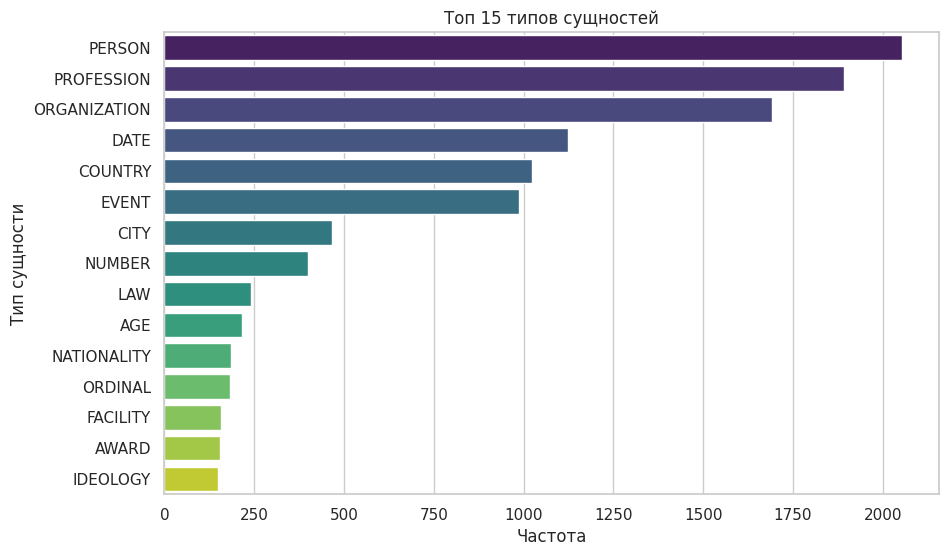

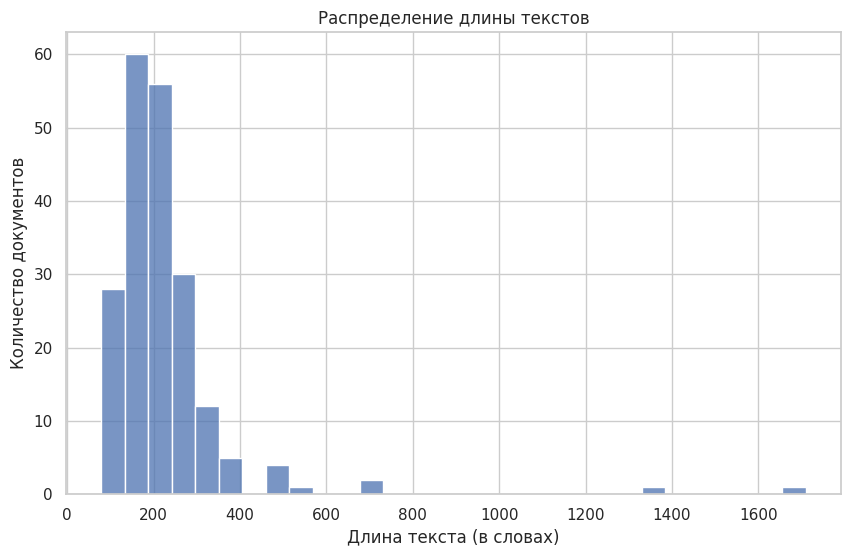

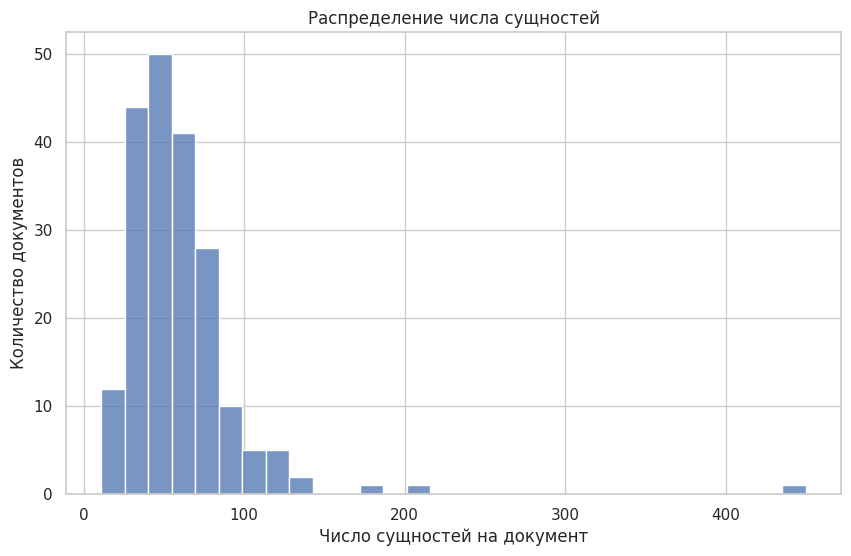

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="DejaVu Sans")

# топ 15 типов сущностей
top_entities = entity_counter.most_common(15)
df_entities = pd.DataFrame(top_entities, columns=["Entity", "Count"])

plt.figure(figsize=(10,6))
sns.barplot(data=df_entities, x="Count", y="Entity", palette="viridis")
plt.title("Топ 15 типов сущностей")
plt.xlabel("Частота")
plt.ylabel("Тип сущности")
plt.show()


# распределение длины текстов
plt.figure(figsize=(10,6))
sns.histplot(text_lengths, bins=30, kde=False)
plt.xlabel("Длина текста (в словах)")
plt.ylabel("Количество документов")
plt.title("Распределение длины текстов")
plt.show()


# распределение числа сущностей на документ
plt.figure(figsize=(10,6))
sns.histplot(entities_per_doc, bins=30, kde=False)
plt.xlabel("Число сущностей на документ")
plt.ylabel("Количество документов")
plt.title("Распределение числа сущностей")
plt.show()


In [ ]:
from IPython.display import Markdown

Markdown("""
### Выводы
1. В корпусе встречаются очень частые типы сущностей (PERSON, PROFESSION etc.), но и редкие типы (AWARD, IDEOLOGY), может возникнуть дисбаланс классов.
2. Длина документов стакже неравномерно распределена: есть и короткие тексты, и длинные, поэтому при моделировании важно применить padding, truncation.
""")


### Выводы
1. В корпусе встречаются очень частые типы сущностей (PERSON, PROFESSION etc.), но и редкие типы (AWARD, IDEOLOGY), может возникнуть дисбаланс классов.
2. Длина документов стакже неравномерно распределена: есть и короткие тексты, и длинные, поэтому при моделировании важно применить padding, truncation.


In [ ]:

import re
from collections import Counter

# Функции парсинга строкового формата NEREL
def parse_entity_line(line: str):
    parts = line.split('\t')
    if len(parts) < 3:
        return None
    ent_id = parts[0].strip()
    type_pos = parts[1].strip()
    text = parts[2].strip() if len(parts) > 2 else ''
    m = re.match(r'(\S+)\s+(\d+)\s+(\d+)', type_pos)
    if not m:
        return None
    ent_type = m.group(1)
    start = int(m.group(2))
    end = int(m.group(3))
    return {'id': ent_id, 'type': ent_type, 'start': start, 'end': end, 'text': text}

def parse_relation_line(line: str):
    parts = line.split('\t')
    if len(parts) < 2:
        return None
    rel_id = parts[0].strip()
    body = parts[1].strip()
    m = re.match(r'(\S+)\s+Arg1:(\S+)\s+Arg2:(\S+)', body)
    if not m:
        return None
    rel_type = m.group(1)
    arg1 = m.group(2); arg2 = m.group(3)
    return {'id': rel_id, 'type': rel_type, 'arg1': arg1, 'arg2': arg2}



In [ ]:
def whitespace_tokenize_with_offsets(text: str):
    tokens = []
    spans = []
    pos = 0
    for tok in text.split():
        start = text.find(tok, pos)
        end = start + len(tok)
        tokens.append(tok)
        spans.append((start, end))
        pos = end
    return tokens, spans


def build_examples_from_nerel(records, event_list):
    examples = []
    event2idx = {ev: i for i, ev in enumerate(event_list)}

    for rec in records:
        text = rec["text"]
        tokens, token_spans = whitespace_tokenize_with_offsets(text)
        token_labels = ["O"] * len(tokens)
        cls_vec = [0] * len(event_list)

        # сущности
        for e in rec.get("entities", []):
            ent = parse_entity_line(e)
            if not ent:
                continue
            span_start, span_end = ent["start"], ent["end"]

            overlapping_idxs = []
            for i, (t_start, t_end) in enumerate(token_spans):
                if not (t_end <= span_start or t_start >= span_end):
                    overlapping_idxs.append(i)

            for j, tok_idx in enumerate(overlapping_idxs):
                if token_labels[tok_idx] != "O":
                    continue
                prefix = "B" if j == 0 else "I"
                token_labels[tok_idx] = f"{prefix}-{ent['type']}"

        # отношения
        for r in rec.get("relations", []):
            rel = parse_relation_line(r)
            if not rel:
                continue
            if rel["type"] in event2idx:
                cls_vec[event2idx[rel["type"]]] = 1

        examples.append({
            "id": rec["id"],
            "text": text,
            "tokens": tokens,
            "token_spans": token_spans,
            "tags": token_labels,
            "cls_vec": cls_vec
        })

    return examples


In [ ]:
from collections import Counter

def make_event_list(records, K=30):
    counter = Counter()
    for rec in records:
        for r in rec.get("relations", []):
            rel = parse_relation_line(r)
            if rel:
                counter[rel["type"]] += 1

    return [t for t, _ in counter.most_common(K)]


In [ ]:
event_list = make_event_list(records, K=30)
print("События:", event_list)

examples = build_examples_from_nerel(records, event_list)
print("Пример tokens, tags:", examples[0]["tokens"][:15], examples[0]["tags"][:15])
print("cls_vec:", examples[0]["cls_vec"])


События: ['WORKPLACE', 'WORKS_AS', 'ALTERNATIVE_NAME', 'PARTICIPANT_IN', 'ORIGINS_FROM', 'HEADQUARTERED_IN', 'POINT_IN_TIME', 'TAKES_PLACE_IN', 'LOCATED_IN', 'AGENT', 'AGE_IS', 'PRODUCES', 'AWARDED_WITH', 'HAS_CAUSE', 'IDEOLOGY_OF', 'MEMBER_OF', 'PART_OF', 'PARENT_OF', 'SUBORDINATE_OF', 'PLACE_RESIDES_IN', 'INANIMATE_INVOLVED', 'MEDICAL_CONDITION', 'CONVICTED_OF', 'DATE_OF_CREATION', 'KNOWS', 'OWNER_OF', 'ABBREVIATION', 'SUBEVENT_OF', 'SIBLING', 'ORGANIZES']
Пример tokens, tags: ['Пулеметы,', 'автоматы', 'и', 'снайперские', 'винтовки', 'изъяты', 'в', 'арендуемом', 'американцами', 'доме', 'в', 'Бишкеке', '05/08/2008', '10:35', 'БИШКЕК,'] ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-NATIONALITY', 'O', 'O', 'B-CITY', 'B-DATE', 'I-TIME', 'B-CITY']
cls_vec: [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


In [ ]:
from datasets import Dataset, DatasetDict

unique_labels = set()
for ex in examples:
    unique_labels.update(ex["tags"])
unique_labels.add("O")
label_list = sorted(unique_labels)
label2id = {lab: i for i, lab in enumerate(label_list)}
id2label = {i: lab for lab, i in label2id.items()}

for ex in examples:
    ex["tags"] = [label2id[t] for t in ex["tags"]]

full_ds = Dataset.from_list(examples)
split = full_ds.train_test_split(test_size=0.1, seed=42)
dataset = DatasetDict({"train": split["train"], "test": split["test"]})
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'tokens', 'token_spans', 'tags', 'cls_vec'],
        num_rows: 180
    })
    test: Dataset({
        features: ['id', 'text', 'tokens', 'token_spans', 'tags', 'cls_vec'],
        num_rows: 20
    })
})


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased", use_fast=True)

def tokenize_and_align_labels(examples_batch, tokenizer, max_length=256):
    tokenized = tokenizer(
        examples_batch["tokens"],
        is_split_into_words=True,
        truncation=True,
        padding="max_length",
        max_length=max_length,
        return_offsets_mapping=True
    )

    labels = []
    for i, word_labels in enumerate(examples_batch["tags"]):
        word_ids = tokenized.word_ids(batch_index=i)
        label_ids = []
        prev_word_idx = None
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != prev_word_idx:
                label_ids.append(word_labels[word_idx])
            else:
                label_ids.append(-100)
            prev_word_idx = word_idx
        labels.append(label_ids)

    tokenized["labels"] = labels
    tokenized["cls_labels"] = examples_batch["cls_vec"]
    tokenized.pop("offset_mapping")
    return tokenized


In [ ]:
tokenized_dataset = dataset.map(
    lambda x: tokenize_and_align_labels(x, tokenizer),
    batched=True,
    remove_columns=["text", "tokens", "tags", "token_spans", "id"]
)

print(tokenized_dataset)
print(tokenized_dataset["train"][0])

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['cls_vec', 'input_ids', 'token_type_ids', 'attention_mask', 'labels', 'cls_labels'],
        num_rows: 180
    })
    test: Dataset({
        features: ['cls_vec', 'input_ids', 'token_type_ids', 'attention_mask', 'labels', 'cls_labels'],
        num_rows: 20
    })
})
{'cls_vec': [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 'input_ids': [101, 17039, 34198, 7415, 51048, 39803, 12413, 17039, 34198, 7415, 51048, 39803, 12413, 6099, 22671, 7664, 101906, 3441, 104017, 54308, 128, 5785, 2067, 12837, 30396, 845, 17382, 3468, 14125, 845, 22550, 37140, 30278, 16205, 38464, 78787, 626, 27336, 845, 12064, 4638, 1768, 132, 5405, 13736, 39622, 7804, 128, 2743, 14650, 4912, 3370, 76755, 626, 1469, 7483, 22651, 128, 32913, 10053, 845, 33441, 132, 28737, 22766, 4350, 15245, 18560, 845, 28381, 24077, 612, 8369, 42895, 132, 12053, 4139, 27503, 39459, 17234, 23448, 612, 89077, 41234, 6313, 20549, 41008, 2

In [ ]:
from transformers import DataCollatorForTokenClassification
from torch.utils.data import DataLoader
import torch

data_collator = DataCollatorForTokenClassification(tokenizer)

def custom_collator(batch):
    features = [{
        "input_ids": item["input_ids"],
        "attention_mask": item["attention_mask"],
        "labels": item["labels"]
    } for item in batch]

    batch_enc = data_collator(features)

    batch_enc["cls_labels"] = torch.tensor([item["cls_labels"] for item in batch], dtype=torch.float)

    return batch_enc

train_dataloader = DataLoader(
    tokenized_dataset["train"],
    batch_size=16,
    shuffle=True,
    collate_fn=custom_collator)

test_dataloader = DataLoader(
    tokenized_dataset["test"],
    batch_size=16,
    shuffle=False,
    collate_fn=custom_collator)

for batch in train_dataloader:
    print(batch.keys())
    print(batch["input_ids"].shape)
    print(batch["labels"].shape)
    print(batch["cls_labels"].shape)
    break

print("Готово. Примеры для обучения:", len(tokenized_dataset["train"]))

KeysView({'input_ids': tensor([[   101,    781,  34436,  ...,   4415, 115000,    102],
        [   101,    108,  11700,  ...,      0,      0,      0],
        [   101,  45351,   7804,  ...,  24789,  15887,    102],
        ...,
        [   101,  24538,    128,  ...,      0,      0,      0],
        [   101,  31583,    130,  ...,      0,      0,      0],
        [   101,  15055,  14516,  ...,      0,      0,      0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[-100,   56,   56,  ...,   56,   56, -100],
        [-100,   19, -100,  ..., -100, -100, -100],
        [-100,    3,   47,  ...,   56,   56, -100],
        ...,
        [-100,   56, -100,  ..., -100, -100, -100],
        [-100,   24, -100,  ..., -100, -100, -100],
        [-100,   22,    8,  ..., -100, -100, -100]]), 'cls

##### Модель: `JointModel` + custom loss (uncertainty weighting)


In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoConfig

class JointModel(nn.Module):
    def __init__(
        self,
        encoder_name: str = "DeepPavlov/rubert-base-cased",
        num_token_labels: int = 10,
        num_cls_labels: int = 30,
        dropout: float = 0.1,
        use_uncertainty_weight: bool = True,
        pos_weight_cls: torch.Tensor | None = None,
    ):
        super().__init__()
        self.config = AutoConfig.from_pretrained(encoder_name)
        self.encoder = AutoModel.from_pretrained(encoder_name)
        hidden = self.config.hidden_size

        self.dropout = nn.Dropout(dropout)
        self.token_classifier = nn.Linear(hidden, num_token_labels)
        self.cls_classifier   = nn.Linear(hidden, num_cls_labels)


        self.token_loss_fct = nn.CrossEntropyLoss(ignore_index=-100)
        self.cls_loss_fct = nn.BCEWithLogitsLoss(pos_weight=pos_weight_cls)

        self.use_uncertainty_weight = use_uncertainty_weight
        self.log_sigma_token = nn.Parameter(torch.tensor(0.0))
        self.log_sigma_cls   = nn.Parameter(torch.tensor(0.0))

    def forward(
        self,
        input_ids: torch.Tensor,
        attention_mask: torch.Tensor,
        labels: torch.Tensor | None = None,
        cls_labels: torch.Tensor | None = None,
    ):

        enc = self.encoder(input_ids=input_ids, attention_mask=attention_mask, return_dict=True)
        seq = enc.last_hidden_state
        pooled = seq[:, 0, :]

        seq = self.dropout(seq)
        pooled = self.dropout(pooled)

        token_logits = self.token_classifier(seq)
        cls_logits   = self.cls_classifier(pooled)

        out = {"token_logits": token_logits, "cls_logits": cls_logits}

        if labels is not None and cls_labels is not None:
            token_loss = self.token_loss_fct(
                token_logits.view(-1, token_logits.size(-1)),
                labels.view(-1)
            )
            cls_loss = self.cls_loss_fct(cls_logits, cls_labels.float())

            if self.use_uncertainty_weight:
                # exp(-2*log_sigma)*L + log_sigma
                loss_token_term = torch.exp(-2.0 * self.log_sigma_token) * token_loss + self.log_sigma_token
                loss_cls_term   = torch.exp(-2.0 * self.log_sigma_cls)   * cls_loss   + self.log_sigma_cls
                loss = loss_token_term + loss_cls_term
                out.update({
                    "loss": loss,
                    "token_loss": token_loss.detach(),
                    "cls_loss": cls_loss.detach(),
                    "log_sigma_token": self.log_sigma_token.detach(),
                    "log_sigma_cls": self.log_sigma_cls.detach(),
                })
            else:
                loss = token_loss + cls_loss
                out.update({
                    "loss": loss,
                    "token_loss": token_loss.detach(),
                    "cls_loss": cls_loss.detach(),
                })

        return out


In [ ]:
num_token_labels = len(set(id2label.keys()))
num_cls_labels   = len(examples[0]["cls_vec"])

model = JointModel(
    encoder_name="DeepPavlov/rubert-base-cased",
    num_token_labels=num_token_labels,
    num_cls_labels=num_cls_labels,
    dropout=0.1,
    use_uncertainty_weight=True,
    pos_weight_cls=None
).to("cuda" if torch.cuda.is_available() else "cpu")


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


##### Training / Validation



In [ ]:
import torch
from transformers import get_linear_schedule_with_warmup

device = "cuda" if torch.cuda.is_available() else "cpu"

epochs = 10
lr = 5e-5

optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)

num_training_steps = epochs * len(train_dataloader)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * num_training_steps),
    num_training_steps=num_training_steps
)

In [ ]:
!pip install seqeval
from seqeval.metrics import f1_score as seqeval_f1
from sklearn.metrics import f1_score, precision_score, recall_score

def compute_token_f1(preds, labels, id2label):
    true_labels = []
    pred_labels = []

    for p, l in zip(preds, labels):
        cur_true, cur_pred = [], []
        for pi, li in zip(p, l):
            if li == -100:
                continue
            cur_true.append(id2label[li])
            cur_pred.append(id2label[pi])
        true_labels.append(cur_true)
        pred_labels.append(cur_pred)

    return seqeval_f1(true_labels, pred_labels, average="macro")

def compute_cls_metrics(preds, labels):
    preds_bin = (preds > 0).astype(int)
    micro_f1 = f1_score(labels, preds_bin, average="micro", zero_division=0)
    prec = precision_score(labels, preds_bin, average="micro", zero_division=0)
    rec = recall_score(labels, preds_bin, average="micro", zero_division=0)
    return micro_f1, prec, rec


In [ ]:
import numpy as np

log_table = []

for epoch in range(1, epochs+1):
    model.train()
    total_loss = 0.0
    for batch in train_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        cls_labels = batch["cls_labels"].to(device)

        optimizer.zero_grad()
        out = model(input_ids, attention_mask, labels=labels, cls_labels=cls_labels)
        loss = out["loss"]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)

    model.eval()
    all_preds_token, all_labels_token = [], []
    all_preds_cls, all_labels_cls = [], []

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            cls_labels = batch["cls_labels"].to(device)

            out = model(input_ids, attention_mask)
            token_logits = out["token_logits"].cpu().numpy()
            cls_logits = out["cls_logits"].cpu().numpy()

            # токены
            preds = np.argmax(token_logits, axis=-1)
            all_preds_token.extend(preds.tolist())
            all_labels_token.extend(labels.cpu().numpy().tolist())

            # cls
            all_preds_cls.extend(cls_logits)
            all_labels_cls.extend(cls_labels.cpu().numpy())

    token_f1 = compute_token_f1(all_preds_token, all_labels_token, id2label)
    cls_f1, cls_prec, cls_rec = compute_cls_metrics(np.array(all_preds_cls), np.array(all_labels_cls))

    log_table.append({
        "epoch": epoch,
        "train_loss": round(avg_train_loss, 4),
        "token_f1": round(token_f1, 4),
        "cls_f1": round(cls_f1, 4),
        "cls_prec": round(cls_prec, 4),
        "cls_rec": round(cls_rec, 4)
    })

    print(f"Epoch {epoch} | loss {avg_train_loss:.4f} | token-F1 {token_f1:.4f} | "
          f"cls-F1 {cls_f1:.4f} | P {cls_prec:.4f} | R {cls_rec:.4f}")


Epoch 1 | loss 0.5385 | token-F1 0.4421 | cls-F1 0.6787 | P 0.7674 | R 0.6083
Epoch 2 | loss 0.5070 | token-F1 0.4478 | cls-F1 0.6564 | P 0.7399 | R 0.5899
Epoch 3 | loss 0.4628 | token-F1 0.4563 | cls-F1 0.6768 | P 0.7486 | R 0.6175
Epoch 4 | loss 0.4115 | token-F1 0.4682 | cls-F1 0.6946 | P 0.7460 | R 0.6498
Epoch 5 | loss 0.3821 | token-F1 0.5091 | cls-F1 0.6856 | P 0.7778 | R 0.6129
Epoch 6 | loss 0.3545 | token-F1 0.4768 | cls-F1 0.6900 | P 0.7541 | R 0.6359
Epoch 7 | loss 0.3290 | token-F1 0.5089 | cls-F1 0.6902 | P 0.7611 | R 0.6313
Epoch 8 | loss 0.3118 | token-F1 0.5056 | cls-F1 0.6856 | P 0.7778 | R 0.6129
Epoch 9 | loss 0.3003 | token-F1 0.4950 | cls-F1 0.7027 | P 0.7526 | R 0.6590
Epoch 10 | loss 0.2910 | token-F1 0.5383 | cls-F1 0.6886 | P 0.7640 | R 0.6267


In [ ]:
import pandas as pd
df_log = pd.DataFrame(log_table)
display(df_log)

,epoch,train_loss,token_f1,cls_f1,cls_prec,cls_rec
0,1,0.5385,0.4421,0.6787,0.7674,0.6083
1,2,0.5070,0.4478,0.6564,0.7399,0.5899
2,3,0.4628,0.4563,0.6768,0.7486,0.6175
3,4,0.4115,0.4682,0.6946,0.7460,0.6498
4,5,0.3821,0.5091,0.6856,0.7778,0.6129
5,6,0.3545,0.4768,0.6900,0.7541,0.6359
6,7,0.3290,0.5089,0.6902,0.7611,0.6313
7,8,0.3118,0.5056,0.6856,0.7778,0.6129
8,9,0.3003,0.4950,0.7027,0.7526,0.6590
9,10,0.2910,0.5383,0.6886,0.7640,0.6267


In [ ]:
from IPython.display import Markdown

Markdown("""
### Выводы
1. Модель уверенно обучается: train loss падает от 0.54 до 0.29.
2. CLS-задача стабильно даёт довольно высокий F1 ≈ 0.70 уже с первых эпох.
3. Token-level F1 находится не на очень высоком уровне, значит выделение сущностей сложнее и требует дообучения.
""")


### Выводы
1. Модель уверенно обучается: train loss падает от 0.54 до 0.29.
2. CLS-задача стабильно даёт довольно высокий F1 ≈ 0.70 уже с первых эпох.
3. Token-level F1 находится не на очень высоком уровне, значит выделение сущностей сложнее и требует дообучения.


##### Инференс, квантизация и анализ ошибок

In [ ]:
import torch
import numpy as np

def predict(model, tokenizer, text, id2label, cls_event_list, device="cpu", max_length=128):
    model.eval()
    encoding = tokenizer(
        text.split(),
        is_split_into_words=True,
        truncation=True,
        padding="max_length",
        max_length=max_length,
        return_tensors="pt"
    )

    input_ids = encoding["input_ids"].to(device)
    attention_mask = encoding["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask)

    # токенные предсказания
    token_logits = outputs["token_logits"].cpu().numpy()[0]
    pred_ids = np.argmax(token_logits, axis=-1)

    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    pred_labels = [
        id2label[i] if mask == 1 else "PAD"
        for i, (mask, i) in enumerate(zip(attention_mask[0].tolist(), pred_ids))
    ]

    # CLS вероятности
    cls_logits = outputs["cls_logits"].cpu().numpy()[0]
    cls_probs = torch.sigmoid(torch.tensor(cls_logits)).numpy()
    cls_pred = {cls_event_list[i]: float(cls_probs[i]) for i in range(len(cls_probs))}

    return tokens, pred_labels, cls_pred


In [ ]:
def qualitative_analysis(model, tokenizer, dataset, id2label, cls_event_list, n=10, device="cpu"):
    for i in range(n):
        ex = dataset[i]
        text = ex["text"]
        true_tags = [id2label[t] for t in ex["tags"]]
        true_cls = ex["cls_vec"]

        tokens, pred_tags, cls_pred = predict(model, tokenizer, text, id2label, cls_event_list, device=device)

        print(f"\nПример {i+1}")
        print("Текст:", text[:200], "...")
        print("GT tags :", true_tags[:20])
        print("Pred tags:", pred_tags[:20])

        true_cls_labels = [cls_event_list[j] for j, v in enumerate(true_cls) if v == 1]
        pred_cls_labels = [k for k, v in cls_pred.items() if v > 0.5]

        print("GT CLS :", true_cls_labels)
        print("Pred CLS:", pred_cls_labels)

        fp = set(pred_cls_labels) - set(true_cls_labels)
        fn = set(true_cls_labels) - set(pred_cls_labels)
        if fp:
            print("False Positives:", fp)
        if fn:
            print("False Negatives:", fn)


In [ ]:
qualitative_analysis(
    model, tokenizer, dataset["test"],
    id2label=id2label, cls_event_list=event_list,
    n=10, device=device
)


Пример 1
Текст: Аргентина потеряла бывшего президента

27 октября утром в ходе совещания, проводимого в  своем доме, потерял сознание и был срочно госпитализирован бывший президент Аргентины Нестор Киршнер. Случилось ...
GT tags : ['B-COUNTRY', 'O', 'O', 'B-PROFESSION', 'B-DATE', 'I-DATE', 'I-TIME', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DISEASE', 'I-DISEASE', 'O', 'O', 'O', 'B-EVENT']
Pred tags: ['B-PROFESSION', 'B-COUNTRY', 'O', 'O', 'B-PROFESSION', 'B-DATE', 'I-DATE', 'I-TIME', 'O', 'O', 'B-EVENT', 'O', 'O', 'O', 'O', 'O', 'O', 'B-EVENT', 'I-DISEASE', 'O']
GT CLS : ['WORKPLACE', 'WORKS_AS', 'ALTERNATIVE_NAME', 'PARTICIPANT_IN', 'POINT_IN_TIME', 'TAKES_PLACE_IN', 'LOCATED_IN', 'HAS_CAUSE', 'MEDICAL_CONDITION']
Pred CLS: ['WORKPLACE', 'WORKS_AS', 'ALTERNATIVE_NAME', 'PARTICIPANT_IN', 'POINT_IN_TIME', 'TAKES_PLACE_IN', 'LOCATED_IN', 'AGE_IS', 'HAS_CAUSE']
False Positives: {'AGE_IS'}
False Negatives: {'MEDICAL_CONDITION'}

Пример 2
Текст: Смена портретов на долларах
Гарриет Табмен
Купюр

In [ ]:
import torch.nn as nn
import torch
import time

model_cpu = model.to("cpu").eval()

# динамическая квантизация
quantized_model = torch.quantization.quantize_dynamic(
    model_cpu, {nn.Linear}, dtype=torch.qint8
)

print("Обычная модель (fp32):")
print(model_cpu)
print("Квантизированная модель (int8):")
print(quantized_model)

/tmp/ipython-input-2980183283.py:8: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  quantized_model = torch.quantization.quantize_dynamic(


Обычная модель (fp32):
JointModel(
  (encoder): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,)

In [ ]:
text = "Россия и США подписали новое соглашение о ядерном разоружении."

_ = predict(model_cpu, tokenizer, text, id2label, event_list)
_ = predict(quantized_model, tokenizer, text, id2label, event_list)

N = 50
start = time.time()
for _ in range(N):
    _ = predict(model_cpu, tokenizer, text, id2label, event_list)
time_fp32 = (time.time() - start) / N

start = time.time()
for _ in range(N):
    _ = predict(quantized_model, tokenizer, text, id2label, event_list)
time_int8 = (time.time() - start) / N

print(f"Среднее время fp32: {time_fp32*1000:.2f} ms")
print(f"Среднее время int8: {time_int8*1000:.2f} ms")


Среднее время fp32: 259.97 ms
Среднее время int8: 205.33 ms


In [ ]:
def evaluate_model(eval_model, dataloader, id2label, event_list, device="cpu"):
    eval_model.eval()
    all_preds_token, all_labels_token = [], []
    all_preds_cls, all_labels_cls = [], []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            cls_labels = batch["cls_labels"].to(device)

            out = eval_model(input_ids, attention_mask)
            token_logits = out["token_logits"].cpu().numpy()
            cls_logits = out["cls_logits"].cpu().numpy()

            # токены
            preds = token_logits.argmax(axis=-1)
            all_preds_token.extend(preds.tolist())
            all_labels_token.extend(labels.cpu().numpy().tolist())

            # CLS
            all_preds_cls.extend(cls_logits)
            all_labels_cls.extend(cls_labels.cpu().numpy())

    token_f1 = compute_token_f1(all_preds_token, all_labels_token, id2label)
    cls_f1, cls_prec, cls_rec = compute_cls_metrics(
        np.array(all_preds_cls), np.array(all_labels_cls)
    )
    return token_f1, cls_f1, cls_prec, cls_rec

print("FP32 модель:")
print(evaluate_model(model_cpu, test_dataloader, id2label, event_list))

print("INT8 модель:")
print(evaluate_model(quantized_model, test_dataloader, id2label, event_list))


FP32 модель:
(np.float64(0.538344834862646), 0.6886075949367089, 0.7640449438202247, 0.6267281105990783)
INT8 модель:
(np.float64(0.45830649160268144), 0.6750629722921915, 0.7444444444444445, 0.6175115207373272)


In [ ]:
from IPython.display import Markdown

Markdown("""
### Выводы
1. Модель уверенно предсказывает частые сущности и отношения, но систематически пропускает редкие классы.
2. В CLS-задаче заметен избыток ложноположительных меток: модель добавляет отношения, которых нет в тексте.
3. Квантизация заметно ускорила инференс (примерно на 25%), качество при этом значительно не пострадало.
""")


### Выводы
1. Модель уверенно предсказывает частые сущности и отношения, но систематически пропускает редкие классы.
2. В CLS-задаче заметен избыток ложноположительных меток: модель добавляет отношения, которых нет в тексте.
3. Квантизация заметно ускорила инференс (примерно на 25%), качество при этом значительно не пострадало.
